In [1]:
import scanpy as sc
from anndata.experimental import concat_on_disk
from umap import UMAP
import numpy as np

import bionty as bt
from scdataloader.utils import get_all_ancestors


💡 connected lamindb: jkobject/scprint


In [2]:
ls -alh ../data/step_0_predict.h5ad

-rw-r--r-- 1 jkalfon ml4ig 332M May 30 18:17 ../data/step_0_predict.h5ad


In [2]:
adata = sc.read_h5ad("../data/step_0_predict.h5ad")
adata

In [2]:
adata = sc.read_h5ad("../data/o2uniqsx_predict.h5ad")

In [6]:
celltype = bt.CellType.public(organism="all")

In [14]:
adata

AnnData object with n_obs × n_vars = 320000 × 256
    obs: 'pred_cell_type_ontology_term_id', 'pred_disease_ontology_term_id', 'pred_assay_ontology_term_id', 'pred_self_reported_ethnicity_ontology_term_id', 'pred_sex_ontology_term_id', 'pred_organism_ontology_term_id', 'conv_pred_cell_type_ontology_term_id', 'conv_pred_disease_ontology_term_id', 'conv_pred_assay_ontology_term_id', 'conv_pred_self_reported_ethnicity_ontology_term_id', 'sprint_leiden', 'louvain', 'louvain_1.0', 'louvain_0.5', 'louvain_0.2'
    uns: 'louvain', 'neighbors', 'louvain_0.5_colors'
    obsm: 'X_umap'
    obsp: 'connectivities', 'distances'

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


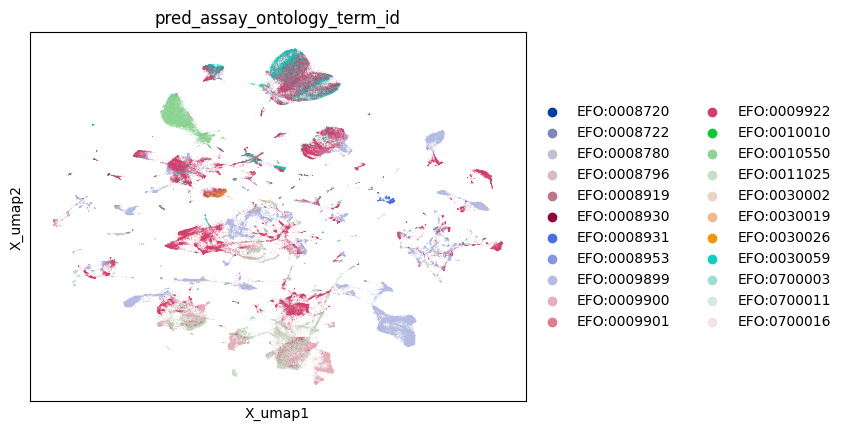

In [42]:
sc.pl.embedding(adata, 'X_umap', color='pred_assay_ontology_term_id')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


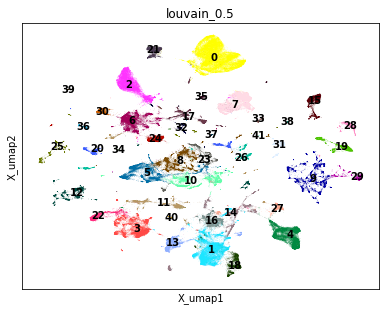

In [89]:
sc.pl.embedding(adata, 'X_umap', color='louvain_0.5', legend_loc='on data')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


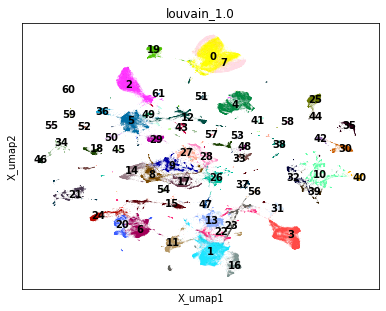

In [64]:
sc.pl.embedding(adata, 'X_umap', color='louvain_1.0', legend_loc='on data')


... storing 'label' as categorical


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


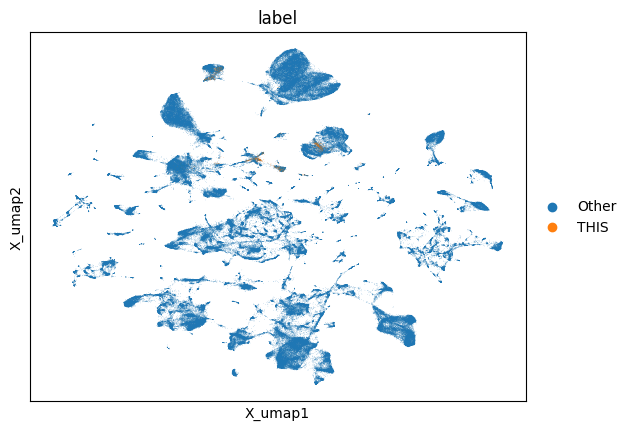

In [101]:
adata.obs['label'] = "Other"
adata.obs.loc[
    #(adata.obs['louvain_0.5']=='17') 
    #& 
    (adata.obs['conv_pred_cell_type_ontology_term_id']=='astrocyte of the cerebral cortex'), 'label'] = "THIS"
sc.pl.embedding(adata, 'X_umap', color='label')

In [146]:
adata.obs[(adata.obs['louvain_1.0']=='19')#& (adata.obs['conv_pred_disease_ontology_term_id']='COVID-19')
]['conv_pred_cell_type_ontology_term_id'].value_counts().head(10)

conv_pred_cell_type_ontology_term_id
oligodendrocyte precursor cell                     4027
oligodendrocyte                                     880
astrocyte of the cerebral cortex                    662
chandelier pvalb GABAergic cortical interneuron     161
midbrain dopaminergic neuron                         38
mature microglial cell                               36
cerebral cortex endothelial cell                     35
sst chodl GABAergic cortical interneuron             19
pulmonary artery endothelial cell                     6
L6b glutamatergic cortical neuron                     5
Name: count, dtype: int64

In [139]:
adata.obs[adata.obs['louvain_1.0']=='4']['conv_pred_assay_ontology_term_id'].value_counts().head(10)

conv_pred_assay_ontology_term_id
10x 3' v3        10176
10x 3' v2         3191
10x multiome       824
sci-RNA-seq         13
Seq-Well             1
STRT-seq             0
sci-Plex             0
microwell-seq        0
inDrop               0
Smart-seq2           0
Name: count, dtype: int64

In [134]:
adata.obs[adata.obs['louvain_1.0']=='4']['pred_organism_ontology_term_id'].value_counts().head(10)

pred_organism_ontology_term_id
NCBITaxon:9606     14205
NCBITaxon:10090        0
Name: count, dtype: int64

In [147]:
adata.obs[adata.obs['louvain_1.0']=='19']['conv_pred_disease_ontology_term_id'].value_counts().head(10)

conv_pred_disease_ontology_term_id
normal                 2673
Lewy body dementia     2425
Parkinson disease       717
glioblastoma             71
Alzheimer disease         0
plasma cell myeloma       0
influenza                 0
kidney oncocytoma         0
long COVID-19             0
lung adenocarcinoma       0
Name: count, dtype: int64

In [40]:
adata.obs[(adata.obs['louvain_0.5']=='0')#& (adata.obs['conv_pred_disease_ontology_term_id']='COVID-19')
]['conv_pred_cell_type_ontology_term_id'].value_counts().head(20)

conv_pred_cell_type_ontology_term_id
chandelier pvalb GABAergic cortical interneuron                                      29156
L6b glutamatergic cortical neuron                                                     2811
L6 intratelencephalic projecting glutamatergic neuron of the primary motor cortex     2055
sst chodl GABAergic cortical interneuron                                              1403
midbrain dopaminergic neuron                                                          1192
oligodendrocyte precursor cell                                                         949
L6 corticothalamic-projecting glutamatergic cortical neuron                            608
lamp5 GABAergic cortical interneuron                                                   200
L5/6 near-projecting glutamatergic neuron of the primary motor cortex                   40
L5 extratelencephalic projecting glutamatergic cortical neuron                          29
retinal ganglion cell                                

In [123]:
main = {
    '0':"interneurons",
    '1':"disease associated T-cells",
    "2": 'sci-RNA-seq interneurons',
    "3": "monocytes",
    "4": "normal T-cells",
    "5": "epithelial cells", # mamary
    "6": "microglial cells", #only subpart "mature microglial cell"
   # "7": "oligodendrocytes",
    "8": "cultured and malignant cells",
    "9": "mouse pancreatic cells",
    "10": "colon and stomach cells",
#    "12": "cancer associated macrophages and T cells",
    "13": "B cells",
    "14": "Ig secreting cells and plasma cells",
    "15": "mouse neurons",
    #"16": 

}

In [148]:
adata.obs["merge_pred_cell_type_ontology_term_id"] = "None"
for k,v in main.items():
    loc = adata.obs['louvain_0.5']==k
    if k == "0":
        adata.obs.loc[loc, 'merge_pred_cell_type_ontology_term_id'] = v
        loc = loc & (adata.obs['conv_pred_disease_ontology_term_id']=='Lewy body dementia')
        adata.obs.loc[loc, 'merge_pred_cell_type_ontology_term_id'] = 'Lewy body dementia interneurons'
    elif k == "6":
        loc = loc & (adata.obs['conv_pred_cell_type_ontology_term_id']=='mature microglial cell')
        adata.obs.loc[loc, 'merge_pred_cell_type_ontology_term_id'] = v
    elif k == "9":
        loc = loc & (adata.obs['conv_pred_cell_type_ontology_term_id'].isin(["type B pancreatic cell","pancreatic A cell", "pancreatic stellate cell", 'pancreatic ductal cell']))
        adata.obs.loc[loc, 'merge_pred_cell_type_ontology_term_id'] = v
    else:
        adata.obs.loc[loc, 'merge_pred_cell_type_ontology_term_id'] = v
    
for k, v in {
    "4": "disease associated oligodendrocytes",
    "19": "oligodendrocytes",
    "46": "cancer associated regulatory T cells",
    "52": "syncytiotrophoblast cells",
    "36": "myocytes",
    "21": "cancer associated macrophages",
}.items():
    loc = adata.obs['louvain_1.0']==k
    adata.obs.loc[loc, 'merge_pred_cell_type_ontology_term_id'] = v

In [ ]:
obj = bt.CellType.public(organism="all")
{i: obj.search(i, field=obj.ontology_id).name.iloc[0] for i in set(val)}

In [9]:
parentdf = (
    bt.CellType.filter()
    .df(include=["parents__ontology_id"])
    .set_index("ontology_id")[['parents__ontology_id']]
)
#parentdf.parents__ontology_id = parentdf.parents__ontology_id.astype(str)

In [10]:
anc={}
for i, (k, v) in enumerate(adata.obs['pred_cell_type_ontology_term_id'].value_counts().items()):
    if v > 100:
        anc[k] = get_all_ancestors(k, parentdf)

In [43]:
anc

{'CL:4023036': {'CL:0000000',
  'CL:0000003',
  'CL:0000099',
  'CL:0000151',
  'CL:0000211',
  'CL:0000255',
  'CL:0000393',
  'CL:0000402',
  'CL:0000404',
  'CL:0000498',
  'CL:0000540',
  'CL:0000548',
  'CL:0000617',
  'CL:0002319',
  'CL:0002371',
  'CL:0008031',
  'CL:0010011',
  'CL:0010012',
  'CL:0011005',
  'CL:2000029',
  'CL:4023018',
  'CL:4023083'},
 'CL:4023050': {'CL:0000000',
  'CL:0000003',
  'CL:0000104',
  'CL:0000151',
  'CL:0000211',
  'CL:0000255',
  'CL:0000393',
  'CL:0000404',
  'CL:0000540',
  'CL:0000548',
  'CL:0000598',
  'CL:0000679',
  'CL:0002319',
  'CL:0002371',
  'CL:0010012',
  'CL:2000029',
  'CL:2000049',
  'CL:4023008',
  'CL:4023040',
  'CL:4023111'},
 'CL:0002057': {'CL:0000000',
  'CL:0000003',
  'CL:0000219',
  'CL:0000226',
  'CL:0000234',
  'CL:0000255',
  'CL:0000325',
  'CL:0000473',
  'CL:0000548',
  'CL:0000576',
  'CL:0000738',
  'CL:0000763',
  'CL:0000766',
  'CL:0000842',
  'CL:0000860',
  'CL:0000988',
  'CL:0001054',
  'CL:000224

In [20]:
lookup = celltype.lookup(celltype.ontology_id)

In [27]:
lookup.cl_0000939.parents

array(['CL:0000824'], dtype=object)

In [18]:
celltype.search(adata.obs['pred_cell_type_ontology_term_id'][0], field=celltype.ontology_id)

/local/scratch/tmp/ipykernel_3675028/2876346383.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  celltype.search(adata.obs['pred_cell_type_ontology_term_id'][0], field=celltype.ontology_id)


,name,definition,synonyms,parents,__ratio__
ontology_id,,,,,
CL:0000939,"CD16-positive, CD56-dim natural killer cell, h...",A Mature Natural Killer Cell That Has The Phen...,"CD16-positive, CD56-positive natural killer ce...",[CL:0000824],100.0
CL:0000930,"CD4-negative, CD8-negative type I NK T cell se...",A Mature Nk T Cell That Secretes Interleukin-4...,"CD4-negative, CD8-negative type I NK T cell se...",[CL:0000924],90.0
CL:0002093,secondary polar body,A Small Cell Formed By The Second Meiotic Divi...,second polar body|polocytus secundarius,[CL:0002090],90.0
CL:0000990,conventional dendritic cell,Conventional Dendritic Cell Is A Dendritic Cel...,cDC|dendritic reticular cell|DC1|type 1 DC,[CL:0000451],90.0
CL:0000991,CD11c-negative plasmacytoid dendritic cell,Cd11C-Negative Plasmacytoid Dendritic Cell Is ...,CD303-positive dendritic cell,[CL:0000784],90.0
...,...,...,...,...,...
CL:4023115,type 1 spiral ganglion neuron,A Spiral Ganglion Neuron That Innervates Inner...,type I spiral ganglion cell,[CL:0011113],50.0
CL:4023116,type 2 spiral ganglion neuron,A Spiral Ganglion Neuron That Innervates Outer...,type II spiral ganglion cell,[CL:0011113],50.0
CL:4023118,L5/6 non-Martinotti sst GABAergic cortical int...,A Sst Gabaergic Interneuron Does Not Have Mart...,L5/6 non-Martinotti morphology sst expressing ...,[CL:4023017],50.0


In [9]:
bt.CellType.search()

/local/scratch/tmp/ipykernel_3675028/4014102153.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bt.CellType.search(adata.obs['pred_cell_type_ontology_term_id'][0]).one()


AttributeError: 'NoneType' object has no attribute 'one'

In [30]:
# Ensure we don't generate large images for inline docs
# You probably want to remove this if running the notebook yourself
import matplotlib
matplotlib.rcParams["figure.dpi"] = 72

import datamapplot

In [4]:
tokeep = [i for i,j in adata.obs['conv_pred_cell_type_ontology_term_id'].value_counts().items() if j > 10_000]

adata.obs["conv_pred_cell_type_ontology_term_id"] = adata.obs["conv_pred_cell_type_ontology_term_id"].cat.add_categories("None")


adata.obs.loc[~adata.obs['conv_pred_cell_type_ontology_term_id'].isin(tokeep), "conv_pred_cell_type_ontology_term_id"] = "None"

In [7]:
len(set(adata.obs['conv_pred_cell_type_ontology_term_id']))

42

In [5]:
len(set(adata.obs['conv_pred_disease_ontology_term_id']))

46

In [26]:
set(adata.obs['pred_sex_ontology_term_id'])

{'PATO:0000383', 'PATO:0000384'}

KeyboardInterrupt: 

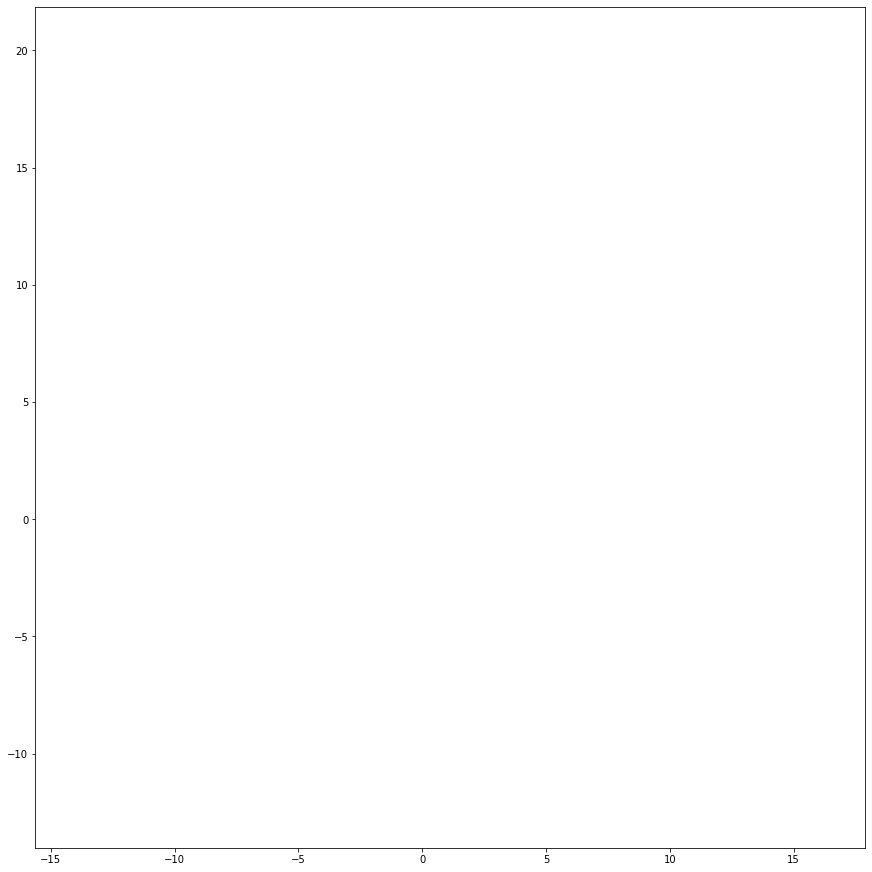

In [106]:
fig, ax =  datamapplot.create_plot(adata.obsm['X_umap'], np.array(adata.obs['conv_pred_disease_ontology_term_id'].tolist()), darkmode=False, title="Predicted Diseases", noise_label="normal")
fig.savefig("../pred_disease_sampled_1M_datamap.pdf", bbox_inches="tight")
fig.show()

In [18]:
adata.obs['conv_pred_cell_type_ontology_term_id'] = adata.obs['conv_pred_cell_type_ontology_term_id'].astype(str)

In [19]:
adata.obs['conv_pred_cell_type_ontology_term_id'].value_counts()

conv_pred_cell_type_ontology_term_id
None                                                                   361938
bronchus fibroblast of lung                                             84251
kidney loop of Henle medullary thick ascending limb epithelial cell     69038
chandelier pvalb GABAergic cortical interneuron                         47305
malignant cell                                                          44958
epithelial cell of proximal tubule segment 3                            38936
vasa recta descending limb cell                                         34033
parietal epithelial cell                                                30855
glomerular capillary endothelial cell                                   30680
kidney distal convoluted tubule epithelial cell                         29656
CD14-positive, CD16-negative classical monocyte                         28855
retinal rod cell                                                        28643
alveolar macrophage        

In [ ]:
sc.pl.umap(adata, color='merge_pred_cell_type_ontology_term_id')

... storing 'merge_pred_cell_type_ontology_term_id' as categorical


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


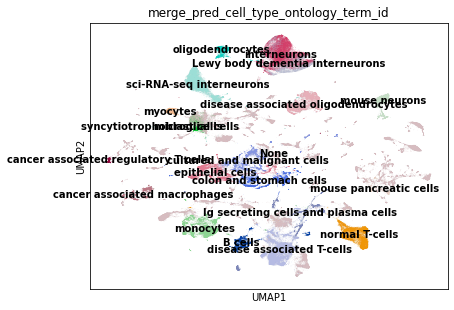

In [149]:
sc.pl.umap(adata, color='merge_pred_cell_type_ontology_term_id', legend_loc='on data')

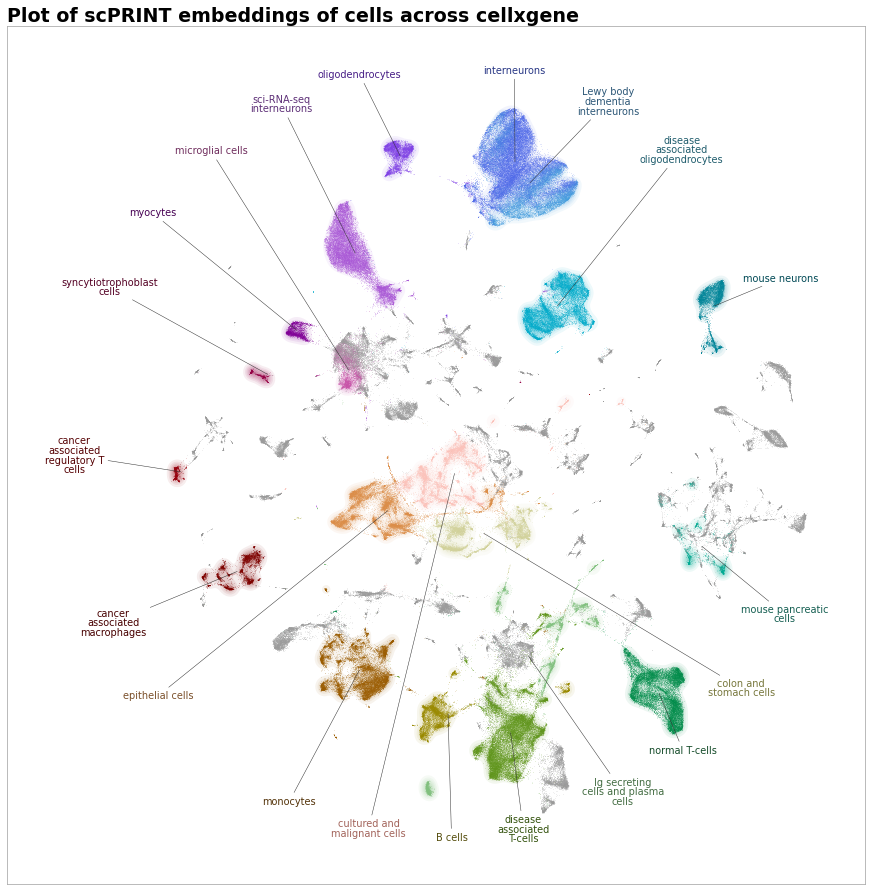

In [150]:
fig, ax =  datamapplot.create_plot(adata.obsm['X_umap'], np.array(adata.obs['merge_pred_cell_type_ontology_term_id'].tolist()), darkmode=False, title="Plot of scPRINT embeddings of cells across cellxgene", noise_label="None")
fig.savefig("../pred_celltype_sampled_1M_datamap.pdf", bbox_inches="tight")
fig.show()